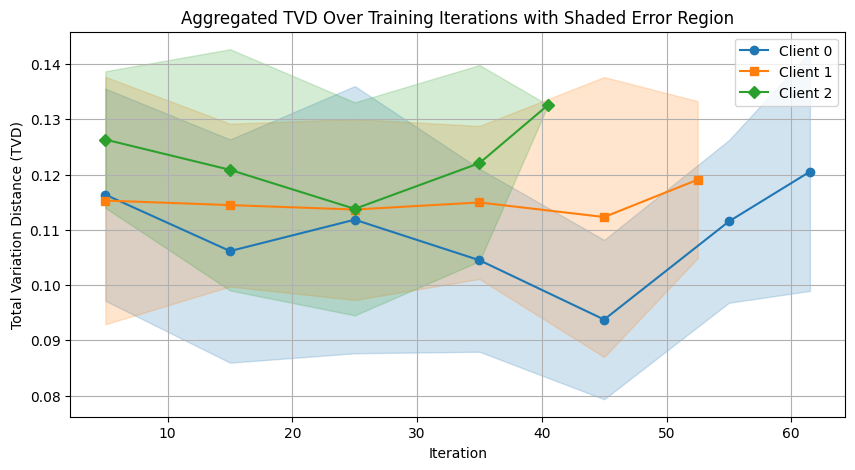

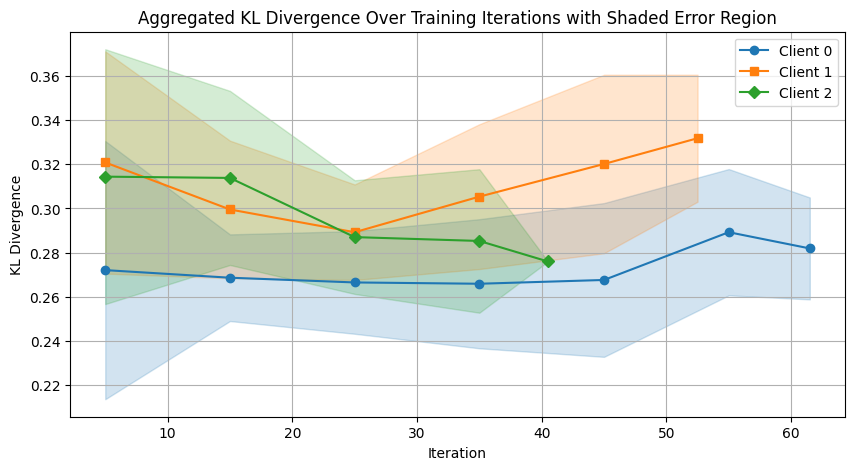

In [194]:
import copy
import pickle
import matplotlib.pyplot as plt
import numpy as np

tvd_thres=0.15

def aggregate_points(data, k):
    """
    Aggregates the data in non-overlapping bins of size k.
    Returns:
      - x_vals: The x-coordinates (using the center index of each bin)
      - agg_means: The mean value in each bin
      - agg_stds: The standard deviation in each bin (as error)
    """
    data = np.array(data)
    n = len(data)
    aggregated_means = []
    aggregated_stds = []
    x_vals = []
    for i in range(0, n, k):
        bin_data = data[i:i+k]
        aggregated_means.append(np.mean(bin_data))
        aggregated_stds.append(np.std(bin_data))
        # x value as the center of the bin (or midpoint index)
        x_vals.append(i + len(bin_data)/2)
    return np.array(x_vals), np.array(aggregated_means), np.array(aggregated_stds)

# Define file names and the directory where the pickle files are stored
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFL'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFL500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFLBin500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcmBin500'

# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFLBin1000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcmBin1000'



# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFLBin10x500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcmBin10x500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcmBin5x500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcmBin5x500ex'


# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFL40x5x500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm40x5x500'

# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm20x5x3000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm20x5x5000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFL20x5x3000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm20x5x500'

# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm20x5x1000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm20x5x1500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFL20x5x2000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFL20x5x1500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm20x5x2000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFL20x5x2000'

# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/rFL_DCM_20x5x1500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/rFL_DCM_20x5x500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/rNoFL_DCM_20x5x2000'


# Results
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/rNoFL_DCM_20x5x2000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/rFL_DCM_20x5x2000'


# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/rNoFL_DCM_20x5x1500'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/rFL_DCM_20x5x1500'

# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/rNoFL_DCM_20x5x1000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/rFL_DCM_20x5x1000'


# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm20x5x1000'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/noFL20x5x1000'



#maximization minimization
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm_minimize'
# opt= 'min'
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/fedcm_maximize'
# opt= 'max'

# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/nonid_min'
# opt= 'min'
save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save/nonid_max'
opt= 'max'


clients=3

file_names = ["dcm_res_cl0.pkl", "dcm_res_cl1.pkl", "dcm_res_cl2.pkl"]




# file_names = ["dcm_res_cl0.pkl", "dcm_res_cl1.pkl", "dcm_res_cl2.pkl", "dcm_res_cl3.pkl", "dcm_res_cl4.pkl"]
# Dictionaries to store TVD and KL results for each client
tvd_results = {}
kl_results = {}





# Load data from each file and extract the TVD and KL values
for i, file in enumerate(file_names):
    with open(f'{save_dir}/{file}', "rb") as f:
        results = pickle.load(f)
        
        
        tvd_results[i] = [entry['tvd'] for entry in results if isinstance(entry, dict) and 'tvd' in entry and entry['tvd']<=tvd_thres]
        kl_results[i]  = [entry['kl']  for entry in results if isinstance(entry, dict) and 'kl' in entry and entry['tvd']<=tvd_thres]

# Define colors and markers for each client
# colors = ['r', 'g', 'b']
# markers = ['o', 's', 'd']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Blue, Orange, Green, Red, Purple
markers = ['o', 's', 'D', '^', 'v']  # Circle, Square, Diamond, Triangle Up, Triangle Down


# Set the aggregation window size (k points per bin)
k = 10

# -------------------------------
# Plot aggregated TVD with shaded error region for each client
plt.figure(figsize=(10, 5))
for i, tvd_values in tvd_results.items():
    x_vals, agg_means, agg_stds = aggregate_points(tvd_values, k)
    plt.plot(x_vals, agg_means, label=f"Client {i}", color=colors[i], marker=markers[i], linestyle='-')
    plt.fill_between(x_vals, agg_means - agg_stds, agg_means + agg_stds, color=colors[i], alpha=0.2)

plt.xlabel("Iteration")
plt.ylabel("Total Variation Distance (TVD)")
plt.title("Aggregated TVD Over Training Iterations with Shaded Error Region")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Plot aggregated KL divergence with shaded error region for each client
plt.figure(figsize=(10, 5))
for i, kl_values in kl_results.items():
    x_vals, agg_means, agg_stds = aggregate_points(kl_values, k)
    plt.plot(x_vals, agg_means, label=f"Client {i}", color=colors[i], marker=markers[i], linestyle='-')
    plt.fill_between(x_vals, agg_means - agg_stds, agg_means + agg_stds, color=colors[i], alpha=0.2)

plt.xlabel("Iteration")
plt.ylabel("KL Divergence")
plt.title("Aggregated KL Divergence Over Training Iterations with Shaded Error Region")
plt.legend()
plt.grid(True)
plt.show()


In [195]:
for i, file in enumerate(file_names):
    with open(f'{save_dir}/{file}', "rb") as f:
        results = pickle.load(f)
        
        
        tvd_results[i] = [entry['tvd'] for entry in results if isinstance(entry, dict) and 'tvd' in entry and entry['tvd']<=tvd_thres]
        kl_results[i]  = [entry['kl']  for entry in results if isinstance(entry, dict) and 'kl' in entry and entry['tvd']<=tvd_thres]


In [191]:
for cl in range(clients):
    for it,x in enumerate(tvd_results[cl]):
        if x==min(tvd_results[cl]):
            print(cl, it,x)

0 41 0.0642
1 16 0.0766
2 18 0.074


# Get max, min value

In [192]:
from copy import deepcopy
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Define the directory and file names (adjust the save_dir if needed)
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save'
file_names = ["dcm_res_cl0.pkl", "dcm_res_cl1.pkl", "dcm_res_cl2.pkl"]

# Dictionaries to store aggregated causal effect data for each client.
# For each client, we will compute the mean and std over all epochs for:
#   - do(Z=0): outcome 0 and outcome 1
#   - do(Z=1): outcome 0 and outcome 1
minmax_effects = {}
client_labels = []

effects_list={}

for i, file in enumerate(file_names):
    with open(f'{save_dir}/{file}', 'rb') as f:
        loaded = pickle.load(f)
        
        results= deepcopy(loaded)

        
        # Lists to collect values over epochs.
        # For do(Z=0)
        effects_z0_o0 = []  # outcome 0
        effects_z0_o1 = []  # outcome 1
        # For do(Z=1)
        effects_z1_o0 = []  # outcome 0
        effects_z1_o1 = []  # outcome 1
        
        
        print(f'Client{i}, len: {len(results)}')
        
        # Loop over all epochs (assuming 300 epochs; adjust if needed)
        for epoch in range(max(0,len(results)-200), len(results)):
            
            if results[epoch]['tvd']>tvd_thres:
                continue
                

            try:
                label0, effect_dict0 = results[epoch][0]
                label1, effect_dict1 = results[epoch][1]
            except (IndexError, ValueError):
                continue  # skip if the structure is not as expected
            
            # Get the probabilities for outcome 0 and outcome 1
            val0_z0 = effect_dict0.get((0,), np.nan)
            val1_z0 = effect_dict0.get((1,), np.nan)
            val0_z1 = effect_dict1.get((0,), np.nan)
            val1_z1 = effect_dict1.get((1,), np.nan)
            
            effects_z0_o0.append(val0_z0)
            effects_z0_o1.append(val1_z0)
            effects_z1_o0.append(val0_z1)
            effects_z1_o1.append(val1_z1)
        
        
        
        effects_list[i]=[effects_z0_o0, effects_z0_o1, effects_z1_o0, effects_z1_o1]
    
        # Compute the mean and standard deviation over epochs for each intervention and outcome.
        
        
        if opt=='max':
            minmax_effects[i] = {
                'z0_outcome0_max': np.nanmax(effects_z0_o0),
                'z0_outcome1_max': np.nanmax(effects_z0_o1),
                'z1_outcome0_max': np.nanmax(effects_z1_o0),
                'z1_outcome1_max': np.nanmax(effects_z1_o1),
            }
        elif opt=='min':
            minmax_effects[i] = {
            'z0_outcome0_min': np.nanmin(effects_z0_o0),
            'z0_outcome1_min': np.nanmin(effects_z0_o1),
            'z1_outcome0_min': np.nanmin(effects_z1_o0),
            'z1_outcome1_min': np.nanmin(effects_z1_o1),
        }

        
        client_labels.append(f"Client {i}")

Client0, len: 75
Client1, len: 72
Client2, len: 72


In [193]:
minmax_effects

{0: {'z0_outcome0_max': 0.0904,
  'z0_outcome1_max': 0.9892,
  'z1_outcome0_max': 0.8854,
  'z1_outcome1_max': 0.2692},
 1: {'z0_outcome0_max': 0.0888,
  'z0_outcome1_max': 0.9918,
  'z1_outcome0_max': 0.8246,
  'z1_outcome1_max': 0.2998},
 2: {'z0_outcome0_max': 0.066,
  'z0_outcome1_max': 0.9952,
  'z1_outcome0_max': 0.8206,
  'z1_outcome1_max': 0.2728}}

Client0, len: 24
Client1, len: 23
Client2, len: 22


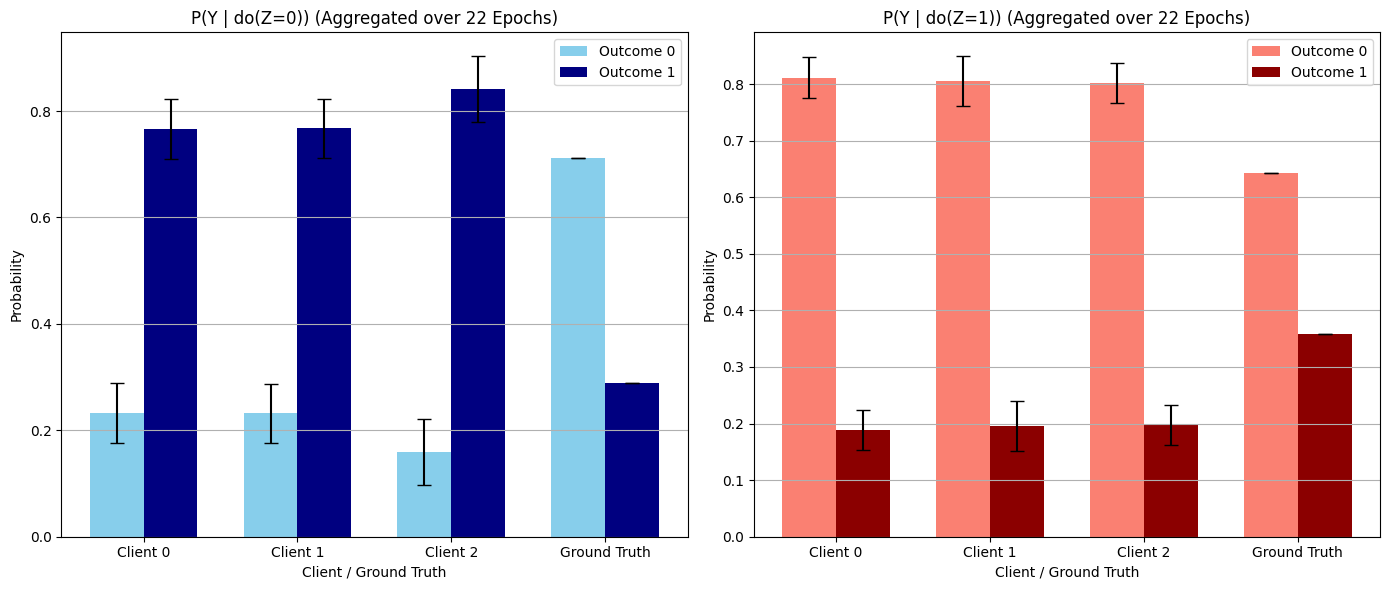

In [151]:
    
from copy import deepcopy
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Define the directory and file names (adjust the save_dir if needed)
# save_dir = '/local/scratch/a/rahman89/PycharmProjects/GenUnseen/MyProjects/CausalFed/FedDCM/Fed_TGAN/save'
file_names = ["dcm_res_cl0.pkl", "dcm_res_cl1.pkl", "dcm_res_cl2.pkl"]

# Dictionaries to store aggregated causal effect data for each client.
# For each client, we will compute the mean and std over all epochs for:
#   - do(Z=0): outcome 0 and outcome 1
#   - do(Z=1): outcome 0 and outcome 1
client_effects = {}
client_labels = []

effects_list={}

for i, file in enumerate(file_names):
    with open(f'{save_dir}/{file}', 'rb') as f:
        loaded = pickle.load(f)
        
        results= deepcopy(loaded)

        
        # Lists to collect values over epochs.
        # For do(Z=0)
        effects_z0_o0 = []  # outcome 0
        effects_z0_o1 = []  # outcome 1
        # For do(Z=1)
        effects_z1_o0 = []  # outcome 0
        effects_z1_o1 = []  # outcome 1
        
        
        print(f'Client{i}, len: {len(results)}')
        
        # Loop over all epochs (assuming 300 epochs; adjust if needed)
        for epoch in range(max(0,len(results)-200), len(results)):
            
            if results[epoch]['tvd']>tvd_thres:
                continue
                

            
            # print(epoch)
            # Each epoch's result is assumed to be structured as follows:
            #   results[epoch][0] = ('P(Y | do(Z=0))', { (0,): value, (1,): value })
            #   results[epoch][1] = ('P(Y | do(Z=1))', { (0,): value, (1,): value })
            try:
                label0, effect_dict0 = results[epoch][0]
                label1, effect_dict1 = results[epoch][1]
            except (IndexError, ValueError):
                continue  # skip if the structure is not as expected
            
            # Get the probabilities for outcome 0 and outcome 1
            val0_z0 = effect_dict0.get((0,), np.nan)
            val1_z0 = effect_dict0.get((1,), np.nan)
            val0_z1 = effect_dict1.get((0,), np.nan)
            val1_z1 = effect_dict1.get((1,), np.nan)
            
            effects_z0_o0.append(val0_z0)
            effects_z0_o1.append(val1_z0)
            effects_z1_o0.append(val0_z1)
            effects_z1_o1.append(val1_z1)
        
        
        
        effects_list[i]=[effects_z0_o0, effects_z0_o1, effects_z1_o0, effects_z1_o1]
        
        # print(f'Client{i}, {np.nanmean(effects_z0_o0)}')
        # print(f'Client{i}, {np.nanstd(effects_z0_o0)}')
        
        # Compute the mean and standard deviation over epochs for each intervention and outcome.
        client_effects[i] = {
            'z0_outcome0_mean': np.nanmean(effects_z0_o0),
            'z0_outcome0_std': np.nanstd(effects_z0_o0),
            'z0_outcome1_mean': np.nanmean(effects_z0_o1),
            'z0_outcome1_std': np.nanstd(effects_z0_o1),
            'z1_outcome0_mean': np.nanmean(effects_z1_o0),
            'z1_outcome0_std': np.nanstd(effects_z1_o0),
            'z1_outcome1_mean': np.nanmean(effects_z1_o1),
            'z1_outcome1_std': np.nanstd(effects_z1_o1),
        }
        client_labels.append(f"Client {i}")

# Provided ground truth values:
# For do(Z=0): outcome 0 = 0.3677848370082622, outcome 1 = 0.6322151629917379
# For do(Z=1): outcome 0 = 0.3999975550405368, outcome 1 = 0.6000024449594632
        
#|X|=2
# ground_truth = {
#     'z0_outcome0': 0.7407533234942046,
#     'z0_outcome1': 0.25924667650579525,
#     'z1_outcome0': 0.7538703848796282,
#     'z1_outcome1': 0.24612961512037176,
# }

# 
# |X|=20
    ground_truth = {
'z0_outcome0': 0.7111775652066921,
'z0_outcome1': 0.28882243479330794,
'z1_outcome0': 0.6422892370679784,
'z1_outcome1': 0.35771076293202175,
}



# [0., 0., 0., 0.]


# Append ground truth as an extra group.
client_labels.append("Ground Truth")

# For plotting, prepare arrays for each intervention:
# For do(Z=0)
z0_outcome0_means = [client_effects[i]['z0_outcome0_mean'] for i in sorted(client_effects.keys())]
z0_outcome0_stds  = [client_effects[i]['z0_outcome0_std'] for i in sorted(client_effects.keys())]
z0_outcome1_means = [client_effects[i]['z0_outcome1_mean'] for i in sorted(client_effects.keys())]
z0_outcome1_stds  = [client_effects[i]['z0_outcome1_std'] for i in sorted(client_effects.keys())]

# Append ground truth (error = 0)
z0_outcome0_means.append(ground_truth['z0_outcome0'])
z0_outcome0_stds.append(0)
z0_outcome1_means.append(ground_truth['z0_outcome1'])
z0_outcome1_stds.append(0)

# For do(Z=1)
z1_outcome0_means = [client_effects[i]['z1_outcome0_mean'] for i in sorted(client_effects.keys())]
z1_outcome0_stds  = [client_effects[i]['z1_outcome0_std'] for i in sorted(client_effects.keys())]
z1_outcome1_means = [client_effects[i]['z1_outcome1_mean'] for i in sorted(client_effects.keys())]
z1_outcome1_stds  = [client_effects[i]['z1_outcome1_std'] for i in sorted(client_effects.keys())]

z1_outcome0_means.append(ground_truth['z1_outcome0'])
z1_outcome0_stds.append(0)
z1_outcome1_means.append(ground_truth['z1_outcome1'])
z1_outcome1_stds.append(0)

# Create x positions for each group (number of clients + ground truth)
x = np.arange(len(client_labels))
bar_width = 0.35

# Create a figure with two subplots (one for each intervention)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for P(Y | do(Z=0))
ax[0].bar(x - bar_width/2, z0_outcome0_means, bar_width, 
          yerr=z0_outcome0_stds, capsize=5, label='Outcome 0', color='skyblue')
ax[0].bar(x + bar_width/2, z0_outcome1_means, bar_width, 
          yerr=z0_outcome1_stds, capsize=5, label='Outcome 1', color='navy')
ax[0].set_xlabel("Client / Ground Truth")
ax[0].set_ylabel("Probability")
ax[0].set_title(f"P(Y | do(Z=0)) (Aggregated over {len(results)} Epochs)")
ax[0].set_xticks(x)
ax[0].set_xticklabels(client_labels)
ax[0].legend()
ax[0].grid(True, axis='y')

# Plot for P(Y | do(Z=1))
ax[1].bar(x - bar_width/2, z1_outcome0_means, bar_width, 
          yerr=z1_outcome0_stds, capsize=5, label='Outcome 0', color='salmon')
ax[1].bar(x + bar_width/2, z1_outcome1_means, bar_width, 
          yerr=z1_outcome1_stds, capsize=5, label='Outcome 1', color='darkred')
ax[1].set_xlabel("Client / Ground Truth")
ax[1].set_ylabel("Probability")
ax[1].set_title(f"P(Y | do(Z=1)) (Aggregated over {len(results)} Epochs)")
ax[1].set_xticks(x)
ax[1].set_xticklabels(client_labels)
ax[1].legend()
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()


In [30]:
client_effects

{0: {'z0_outcome0_mean': 0.7587849999999999,
  'z0_outcome0_std': 0.032723459092828186,
  'z0_outcome1_mean': 0.241215,
  'z0_outcome1_std': 0.032723459092828186,
  'z1_outcome0_mean': 0.613105,
  'z1_outcome0_std': 0.08535829177648765,
  'z1_outcome1_mean': 0.386895,
  'z1_outcome1_std': 0.08535829177648764},
 1: {'z0_outcome0_mean': 0.76765,
  'z0_outcome0_std': 0.03225475933873946,
  'z0_outcome1_mean': 0.23235,
  'z0_outcome1_std': 0.032254759338739454,
  'z1_outcome0_mean': 0.4950049999999999,
  'z1_outcome0_std': 0.13558226644734922,
  'z1_outcome1_mean': 0.504995,
  'z1_outcome1_std': 0.13558226644734922},
 2: {'z0_outcome0_mean': 0.733535,
  'z0_outcome0_std': 0.032116861225842105,
  'z0_outcome1_mean': 0.266465,
  'z0_outcome1_std': 0.032116861225842105,
  'z1_outcome0_mean': 0.563335,
  'z1_outcome0_std': 0.10895829833014098,
  'z1_outcome1_mean': 0.43666499999999997,
  'z1_outcome1_std': 0.10895829833014097}}

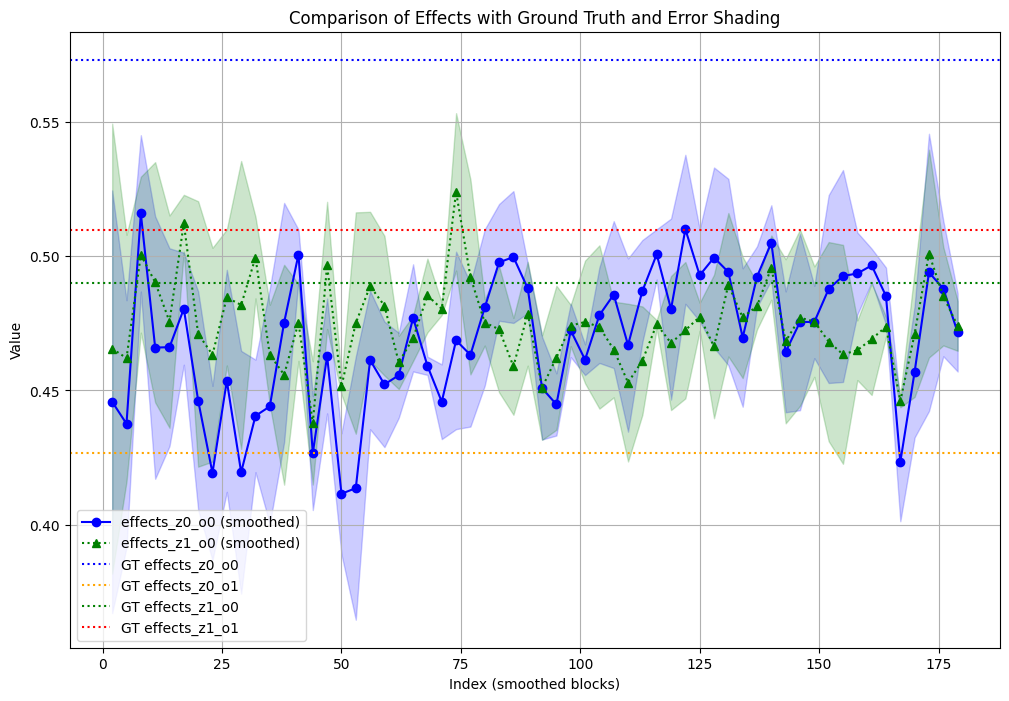

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def smooth_array_with_error(arr, k):
    """
    Splits the array into chunks of size k,
    computes the mean and standard deviation (error) for each chunk.
    
    Parameters:
        arr: array-like, the original data
        k: int, the number of points to average over
        
    Returns:
        x_vals: array of x-axis positions (using the average index of each chunk)
        means: array of smoothed (mean) values
        errors: array of standard deviations for each chunk
    """
    n = len(arr)
    means = []
    errors = []
    x_vals = []
    for i in range(0, n, k):
        chunk = np.array(arr[i: i+k])
        means.append(np.mean(chunk))
        errors.append(np.std(chunk))
        # Compute the average index for the current chunk (starting at 1)
        x_vals.append(np.mean(np.arange(i+1, i+len(chunk)+1)))
    return np.array(x_vals), np.array(means), np.array(errors)


cl=1
ara1= effects_list[cl][0]
ara2= effects_list[cl][1]
ara3= effects_list[cl][2]
ara4= effects_list[cl][3]



# Ground truth values for each effect
# ground_truth = {
#     'z0_outcome0': 0.3834450657287731,
#     'z0_outcome1': 0.6165549342712269,
#     'z1_outcome0': 0.6458558540344472,
#     'z1_outcome1': 0.3541441459655528,
# }


gt_ara1 = list(ground_truth.values())[0]
gt_ara2 = list(ground_truth.values())[1]
gt_ara3 = list(ground_truth.values())[2]
gt_ara4 = list(ground_truth.values())[3]



# Smoothing parameter: average every k points
k = 3

# Compute smoothed means and errors for each array
x1, means1, err1 = smooth_array_with_error(ara1, k)
x2, means2, err2 = smooth_array_with_error(ara2, k)
x3, means3, err3 = smooth_array_with_error(ara3, k)
x4, means4, err4 = smooth_array_with_error(ara4, k)

# Plotting the smoothed curves with shaded error regions
plt.figure(figsize=(12, 8))

# Plot ara1 with error shading
plt.plot(x1, means1, marker='o', linestyle='-', color='blue', label='effects_z0_o0 (smoothed)')
plt.fill_between(x1, means1 - err1, means1 + err1, color='blue', alpha=0.2)
# 
# # Plot ara2 with error shading
# plt.plot(x2, means2, marker='s', linestyle='--', color='orange', label='effects_z0_o1 (smoothed)')
# plt.fill_between(x2, means2 - err2, means2 + err2, color='orange', alpha=0.2)

# Plot ara3 with error shading
plt.plot(x3, means3, marker='^', linestyle=':', color='green', label='effects_z1_o0 (smoothed)')
plt.fill_between(x3, means3 - err3, means3 + err3, color='green', alpha=0.2)

# Plot ara4 with error shading
# plt.plot(x4, means4, marker='d', linestyle='-.', color='red', label='effects_z1_o1 (smoothed)')
# plt.fill_between(x4, means4 - err4, means4 + err4, color='red', alpha=0.2)

# Plot ground truth horizontal lines
plt.axhline(gt_ara1, color='blue', linestyle=':', label='GT effects_z0_o0')
plt.axhline(gt_ara2, color='orange', linestyle=':', label='GT effects_z0_o1')
plt.axhline(gt_ara3, color='green', linestyle=':', label='GT effects_z1_o0')
plt.axhline(gt_ara4, color='red', linestyle=':', label='GT effects_z1_o1')

plt.xlabel('Index (smoothed blocks)')
plt.ylabel('Value')
plt.title('Comparison of Effects with Ground Truth and Error Shading')
plt.legend()
plt.grid(True)
plt.show()


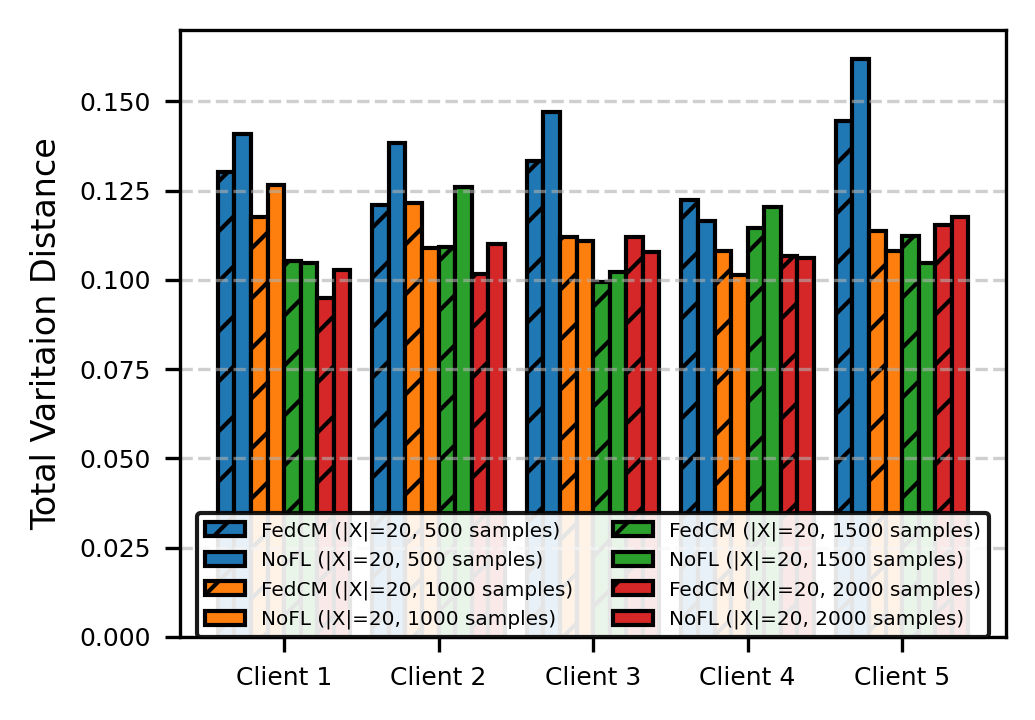

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# Data
clients = np.arange(5)  # Clients 0 to 4

# Data values
data = {
    "rFL_DCM_20x5x500": [0.1303, 0.1211, 0.1334, 0.1225, 0.1445],
    "rNoFL_DCM_20x5x500": [0.1410, 0.1383, 0.1471, 0.1166, 0.1619],
    
    "rFL_DCM_20x5x1000": [0.1176, 0.1214, 0.1120, 0.1081, 0.1136],
    "rNoFL_DCM_20x5x1000": [0.1267, 0.1089, 0.1109, 0.1014, 0.1080],
    
    "rFL_DCM_20x5x1500": [0.1053, 0.1091, 0.0993, 0.1146, 0.1124],
    "rNoFL_DCM_20x5x1500": [0.1047, 0.1261, 0.1023, 0.1204, 0.1048],
    
    "rFL_DCM_20x5x2000": [0.0948, 0.1016, 0.1121, 0.1067, 0.1154],
    "rNoFL_DCM_20x5x2000": [0.1027, 0.1101, 0.1079, 0.1061, 0.1175]

}

# Define properties
sample_sizes = ["500", "1000", "1500", "2000" ]
colors = ['#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e', '#2ca02c', '#2ca02c', '#d62728', '#d62728']
hatches = [ '//',None,  '//', None,  '//', None,  '//', None]  # Hatching pattern for differentiation

bar_width = 0.15  # Width of bars
group_spacing = 0.2  # Space between different client groups

# Create figure
# plt.figure(figsize=(7, 6))
plt.figure(figsize=(3.5, 2.5), dpi=300)


# Adjust client positions for grouped bars
positions = clients * (bar_width * 8 + group_spacing)

# Reorder keys so that same sample sizes appear together
ordered_keys = [
    "rFL_DCM_20x5x500", "rNoFL_DCM_20x5x500", 
    "rFL_DCM_20x5x1000", "rNoFL_DCM_20x5x1000", 
    "rFL_DCM_20x5x1500", "rNoFL_DCM_20x5x1500", 
    "rFL_DCM_20x5x2000", "rNoFL_DCM_20x5x2000"
]

# Plot bars in correct order
for i, key in enumerate(ordered_keys):
    values = data[key]
    plt.bar(positions + (i - 3.5) * bar_width, values, bar_width, 
            color=colors[i], edgecolor='black', hatch=hatches[i], label=key.replace("rFL", "FedCM").replace("r", "").replace("_DCM_20x5x", " (|X|=20, ") + " samples)")

# Labels and title
# plt.xlabel('Client Index', fontsize=12, fontweight='bold')
plt.ylabel('Total Varitaion Distance', fontsize=8)
# plt.title('TVD Across 5 Clients for $P(Z,X,Y)$ w/ Different Sample Sizes', fontsize=7)

# Improve x-axis readability
plt.xticks(positions, labels=[f'Client {i+1}' for i in clients], fontsize=6)
plt.yticks(fontsize=6)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add **legend outside the plot**
plt.legend(fontsize=4.8, loc='upper center', bbox_to_anchor=(0.5, 0.22), ncol=2, frameon=True,  facecolor='white', framealpha=0.9, edgecolor='black')

# Adjust layout for better spacing
plt.tight_layout()


plt.savefig("Figures/dcm_tvd.pdf", dpi=300, bbox_inches='tight')


# Show plot
plt.show()
